<a href="https://colab.research.google.com/github/siddhant-dutta/MOODIFY-learning/blob/main/Copy_of_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math


%matplotlib inline

In [ ]:
# uploading data
AW_data = pd.read_csv('/content/drive/MyDrive/MOODIFY /Introduction to machine learning/Assignment2/MT Assignment/AdvWorksCusts.csv')
AW_avemonth = pd.read_csv('/content/drive/MyDrive/MOODIFY /Introduction to machine learning/Assignment2/MT Assignment/AW_AveMonthSpend.csv')
AW_bikebuyer = pd.read_csv('/content/drive/MyDrive/MOODIFY /Introduction to machine learning/Assignment2/MT Assignment/AW_BikeBuyer.csv')
AW_test = pd.read_csv('/content/drive/MyDrive/MOODIFY /Introduction to machine learning/Assignment2/MT-Assignment-Test/AW_test.csv')

# adding the new columns 
AW_data['AveMonthSpend'] = AW_avemonth['AveMonthSpend']
AW_data['BikeBuyer'] = AW_bikebuyer['BikeBuyer']

AW_data.head(15)
AW_data.shape

(16519, 25)

In [ ]:
AW_data.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

from the above dtypes analysis we see that there are many categorical variables ... but we will see that many of them will not be useful in prediction 

now we will see how many columns have how many empty cells

In [ ]:
AW_data.isnull().sum()

CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

we see that few columns have many null characters therefore it will be better if we remove these columns 

In [ ]:
waste_cols = ['Title', 'MiddleName', 'Suffix', 'AddressLine2']
AW_data.drop(waste_cols, axis = 1, inplace = True )  # axis = 1 as 1 means the change wrt to column 
AW_data.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


now just check how many unique ID's are there 

In [ ]:
print(AW_data.CustomerID.shape)
print(AW_data.CustomerID.unique().shape)

(16519,)
(16404,)


- There are 115 duplicate CustomerID's <br>
- Therefore we have to remove these rows keeping just the last of the duplicate rows 

In [ ]:
AW_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(AW_data.CustomerID.shape)
print(AW_data.CustomerID.unique().shape)

(16404,)
(16404,)


So now the duplicate rows have been removed 

In [ ]:
AW_data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


now to see the stats of categorical variables 

In [ ]:
def cat_col_stats(AW_data, cols):
  for col in cols :
    print('\n' + col)
    print(AW_data[col].value_counts())

cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender',
            'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer' ]
cat_col_stats (AW_data, cat_cols)


CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

Gender
M    8290
F    8114
Name: Gender, dtype: int64

MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64

NumberCarsOwned
2    5741
1    4325
0    3782
3    1429
4    1127
Name: NumberCarsOwned, dtype: int64

NumberChildrenAtHome
0    9924
1    2180
2    1455
3    1057
4     943
5     845
Name: NumberChildrenAtHome, dtype: int64

TotalChildren
0    4244
2    3166
1    3054


Here we can conclude that **fewer customers have bought bike than not bought a bike**

**Setting age column**

In [ ]:
age = []
today_date = pd.to_datetime('1998-1-1')
for dob in AW_data.BirthDate :
  dob = pd.to_datetime(dob)
  age.append(today_date.year - dob.year)
AW_data['age'] = age
AW_data.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,32
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,33
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,33
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,30
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,30


##Data visualization 

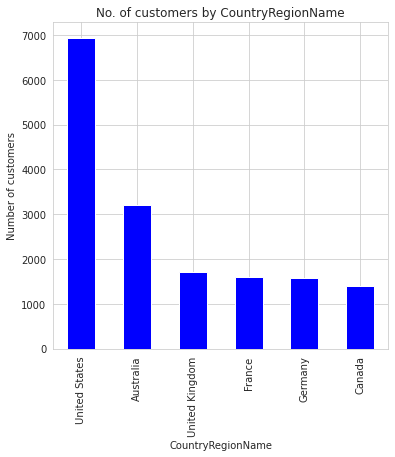

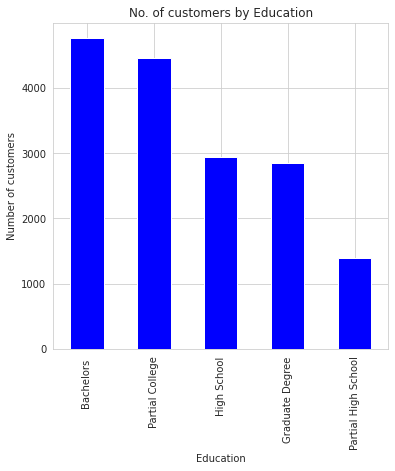

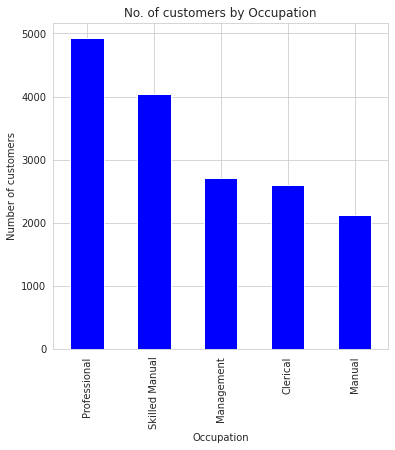

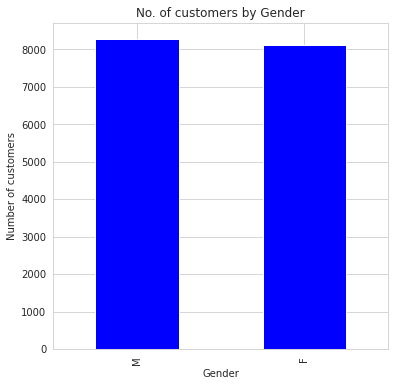

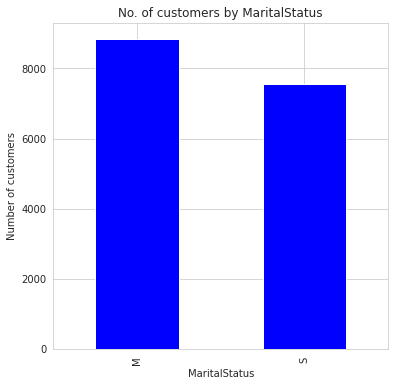

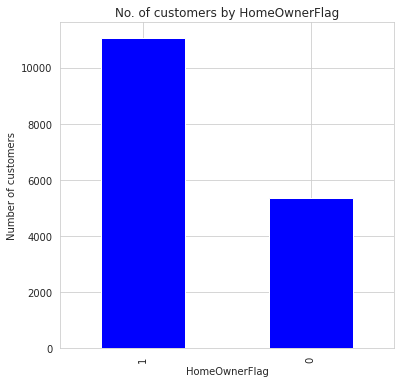

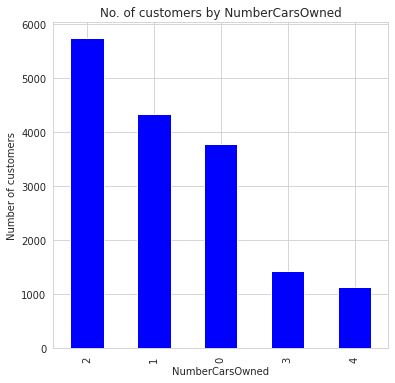

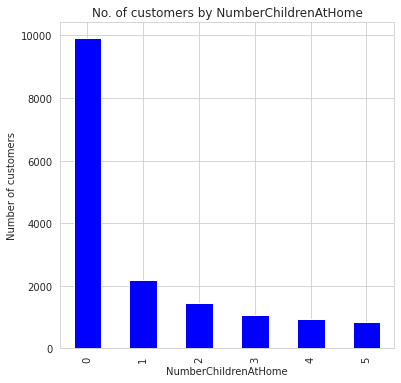

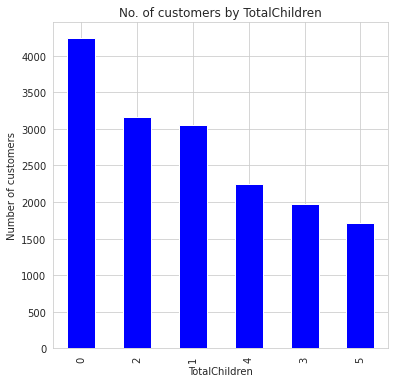

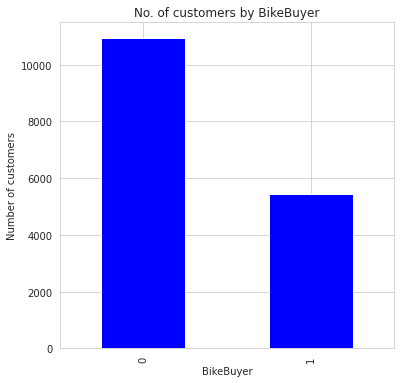

In [ ]:
def plot_bars (data, cols):
  for col in cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis 
    counts = data[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
    ax.set_title('No. of customers by ' + col) # Give the plot a main title
    ax.set_xlabel(col) # Set text for the x axis
    ax.set_ylabel('Number of customers') # Set text for y axis
    plt.show()

plot_bars(AW_data, cat_cols)     


       Occupation  YearlyIncome
0        Clerical       49481.0
1      Management      118781.0
2          Manual       21722.0
3    Professional       99058.0
4  Skilled Manual       66471.5


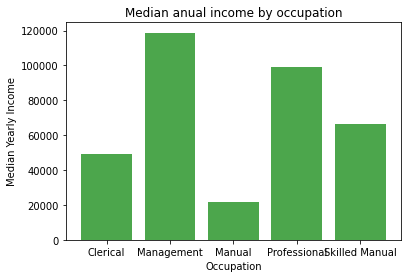

In [ ]:
counts = AW_data.groupby(["Occupation"], as_index = False)['YearlyIncome'].median()
print(counts)
temp = np.array([counts['Occupation'],counts['YearlyIncome']])
plt.bar(temp[0], temp[1], color = 'green', alpha = 0.7)
plt.title('Median anual income by occupation')
plt.xlabel('Occupation')
plt.ylabel('Median Yearly Income')
plt.show()

Therefore we can see here the order of the median anual income by occupation <br>
- Manual < Clerical < Skilled manual < Proffesional < Management

##Relation Between Categorical variables and numeric variables
Here we will just take AveMonthSpend as the y label 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


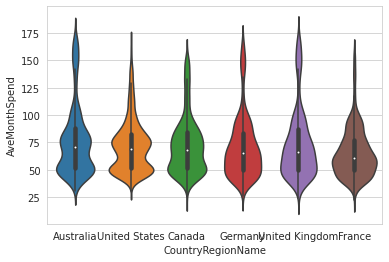

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


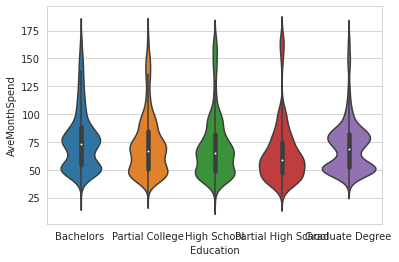

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


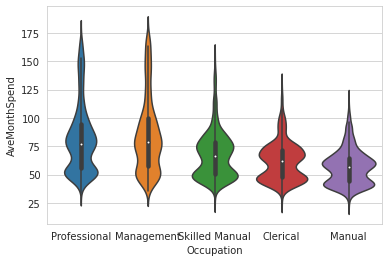

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


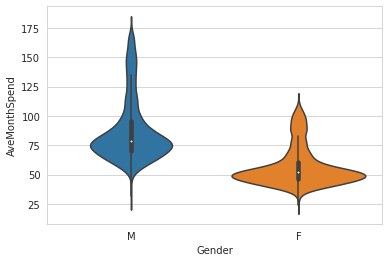

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


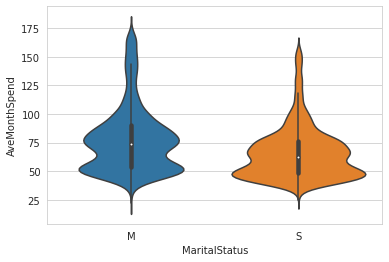

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


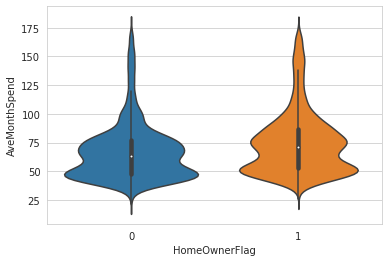

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


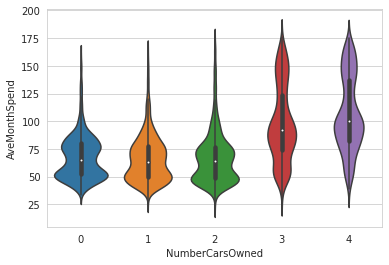

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


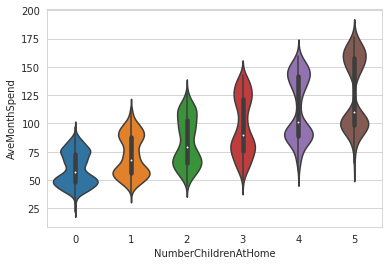

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


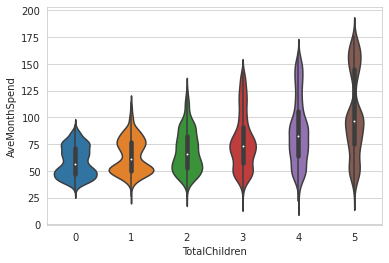

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


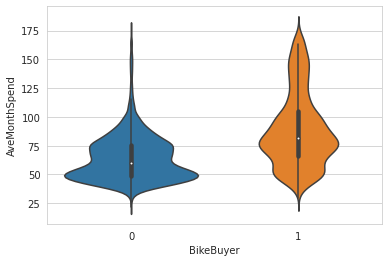

In [ ]:
def plot_violin(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(AW_data, cat_cols)    

**Now let us see the distribution of females and males and females of different ages wrt AveMonthSpend**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


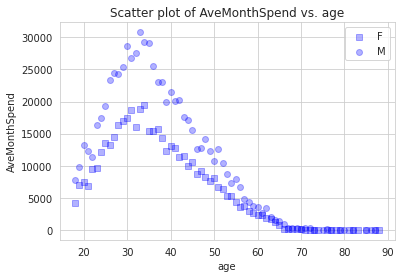

In [ ]:
def plot_scatter_shape(AW_data, cols, shape_col = 'Gender', col_y = 'AveMonthSpend', alpha = 0.3):
    shapes = ['s', 'o', '^', 'x', '+'] # pick distinctive shapes
    unique_cats = AW_data[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = AW_data[AW_data[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
AW_data_grouped = AW_data[['Gender', 'age','AveMonthSpend']].groupby(['Gender', 'age'], as_index = False)['AveMonthSpend'].sum()
num_cols = ['age']
plot_scatter_shape(AW_data_grouped, num_cols)                

Therefore males between age of 25 to 45 spend the most

### Relation between few numerical variables between themselves

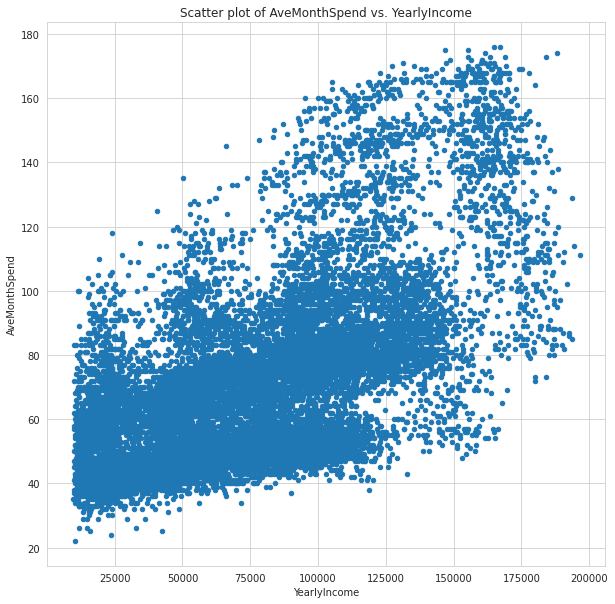

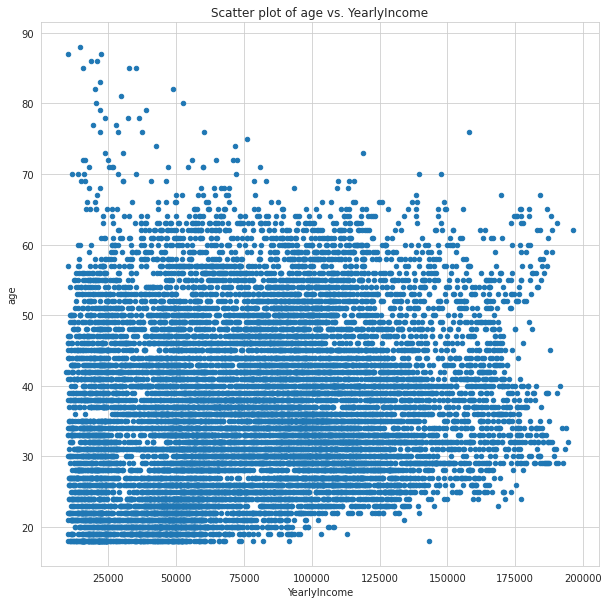

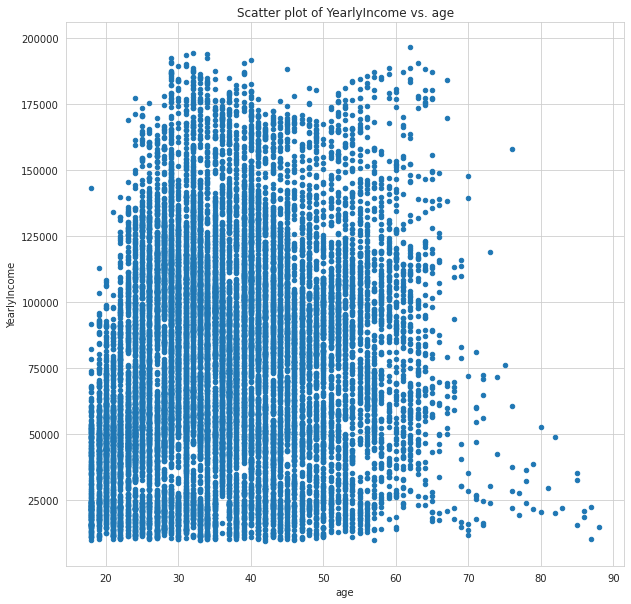

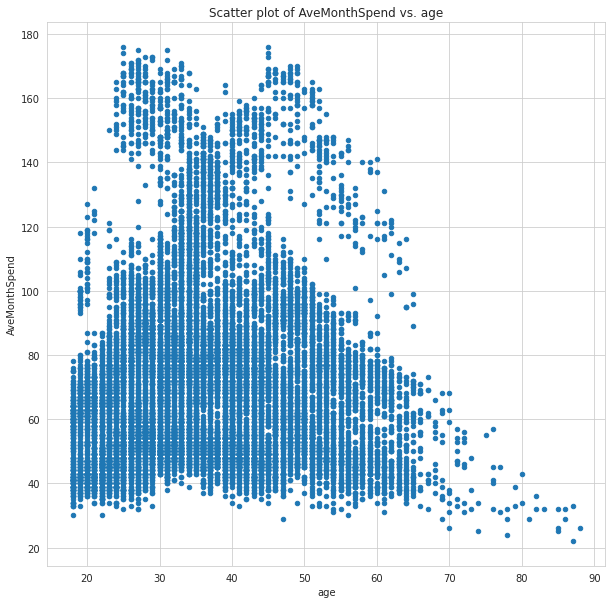

In [ ]:
def plot_scatter(data, cols_x, cols_y ):
    for coli in cols_x:
      for col in cols_y:
        if coli == col or coli == 'AveMonthSpend':
          continue
        fig = plt.figure(figsize=(10, 10)) # define plot are:
        ax = fig.gca() # define axis  :
        data.plot.scatter(x = coli, y = col, ax = ax)
        ax.set_title('Scatter plot of ' + col + ' vs. ' + coli) # Give the plot a main title:
        ax.set_xlabel(coli) # Set text for the x axis:
        ax.set_ylabel(col)# Set text for y axis:
        plt.show()
cols = ['YearlyIncome', 'AveMonthSpend', 'age']
plot_scatter(AW_data, cols, cols)


- Here we can see that AveMonthSpend and age are not linearly dependent
- only AveMonthSpend and YearlyIncome are linearly independent and that too not very close to perfection

# Setting up the regression model

###Creating dummy variables from categorical variables

In [ ]:
print(AW_data['CountryRegionName'].unique())
Features = AW_data['CountryRegionName']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['Australia' 'United States' 'Canada' 'Germany' 'United Kingdom' 'France']
[0 0 0 ... 1 0 5]


In [ ]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [ ]:
type(Features)

numpy.ndarray

In [ ]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['Education', 'Occupation', 'Gender',
            'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome']

for col in categorical_columns:
    temp = encode_string(AW_data[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(16404, 31)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
  0. 0. 0. 0. 1. 0. 0.]]



### Add numeric features

In [ ]:
Features = np.concatenate([Features, np.array(AW_data[['YearlyIncome']])], axis = 1)
Features[:2,:]

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.37947e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.01141e+05]])

In [ ]:
nr.seed(9988)
labels = np.array(AW_data['AveMonthSpend'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 3000)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
print(y_train)
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

[ 57 139  39 ...  73 127  46]


### Scalling the numeric features

In [ ]:
# scaler = preprocessing.StandardScaler().fit(x_train[:,31:])
# x_train[:,31:] = scaler.transform(x_train[:,31:])
# x_test[:,31:] = scaler.transform(x_test[:,31:])
# print(x_train.shape)
x_train[:5,:]

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 8.5772e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 4.7324e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000

In [ ]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 6.03693995e+00  6.80424987e+00  6.32585620e+00  5.68705202e+00
  5.50458059e+00  6.36317611e+00  8.17231648e+00  5.57867037e+00
  7.74838551e+00  7.72636899e+00  7.49611338e+00  8.35658405e+00
  3.95820414e+00  8.30348345e+00  7.65750448e+00  8.44607861e+00
  4.37234482e+00  3.23495099e+01  2.12485947e+01  1.54732600e+01
  8.53122981e+00  7.70622221e+00  7.01707907e+00  7.13875419e+00
  6.32856944e+00 -2.13597807e+01 -1.11292079e+01 -1.34949117e-01
  1.02327184e+01  2.28225124e+01  3.62905616e+01  2.21021717e-04]


In [ ]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 25)    

Mean Square Error      = 37.69364720087437
Root Mean Square Error = 6.139515225233534
Mean Absolute Error    = 4.674164829123394
Median Absolute Error  = 3.6015552204466985
R^2                    = 0.9491760577798203
Adjusted R^2           = 0.9487660495064474


This model evaluation gave us values as required <br>
Therefore it can give fairly accurate predictions 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


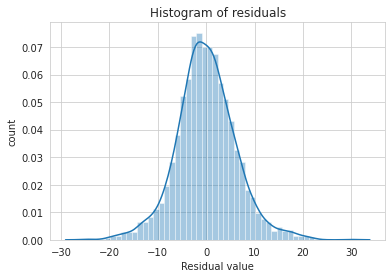

In [ ]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

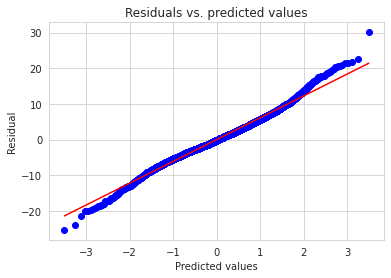

In [ ]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


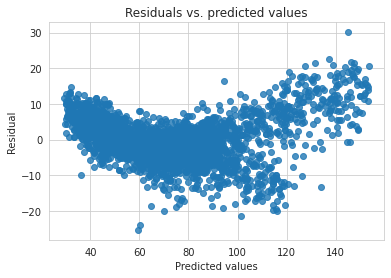

In [ ]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 